# <font color=blue>   Análise Exploratória BI UnB </font>

#### <font color=black>  Estudo sobre o perfil dos alunos do departamento de computação (CIC).</font>
#### <font color=black> Escopo de análise delimitado entre os alunos de graduação do primeiro semestre de 2009 até o último semestre de 2018.</font>

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#read data in pandas dataframe
path = 'data/ira_tipo_escola.csv'
df_analysis =  pd.read_csv(path, sep =';')

#list df head
df_analysis.head()

,IRA,Não_informado,Particular,Pública
0,0.0000,17.0,37.0,33.0
1,0.0333,1.0,0.0,0.0
2,0.0625,0.0,0.0,1.0
3,0.0800,0.0,1.0,0.0
4,0.1473,1.0,0.0,0.0


### <font color=black> Análise da distribuição do IRA baseado no tipo de escola de origem dos alunos.</font>

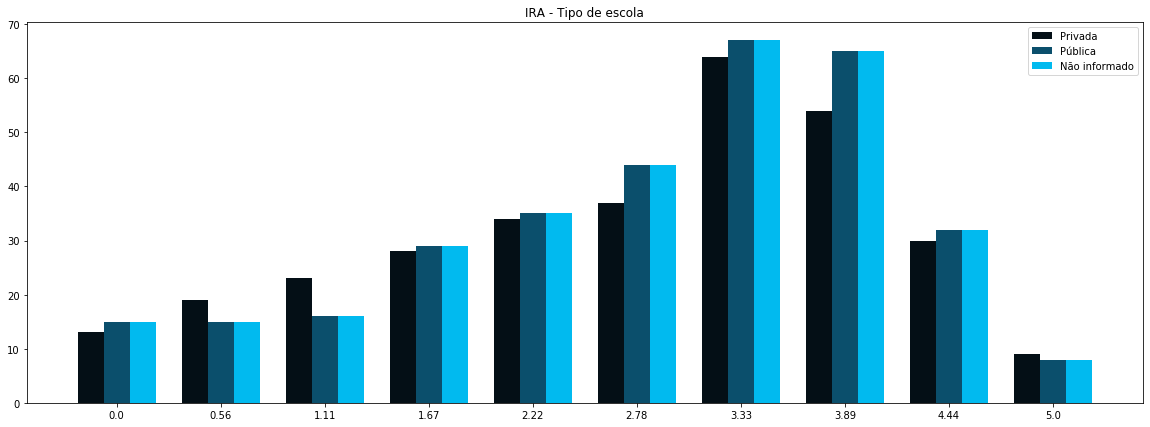

In [22]:
ira = 0.01
delta = 0.5
private = []
public = []
uninformed = []

df_analysis.IRA = df_analysis.IRA.astype(float)

while(ira<=5.0):
    current_ira = df_analysis[(df_analysis.IRA >= ira) & (df_analysis.IRA <= ira + delta)]
    private.append(sum(current_ira.Particular))
    public.append(sum(current_ira.Pública))
    uninformed.append(sum(current_ira.Não_informado))
    ira = ira + delta
    
ira = np.linspace(0.0,5.0,np.size(public))
plt.figure(figsize=(20, 7))
x = np.arange(np.size(public))
private_hist = plt.bar(x-0.25, private, width=0.25, color='#040F16', align='center')
public_hist = plt.bar(x, public, width=0.25, color='#0B4F6C', align='center')
uninformed_hist = plt.bar(x+0.25, public, width=0.25, color='#01BAEF', align='center')
plt.legend( (private_hist[0], public_hist[0], uninformed_hist[0]), ('Privada', 'Pública', 'Não informado') )
plt.title('IRA - Tipo de escola')
plt.xticks(x, np.round(ira, 2))

plt.show()


In [23]:
#read data in pandas dataframe
path = 'data/ira_vs_periodos_cursados.csv'
df_analysis =  pd.read_csv(path, sep =';')
df_analysis2 = pd.read_excel ('data/numero_alunos.xlsx').fillna(value=0)

#list df head
df_analysis.head()
df_analysis2.head()

,Semestre/Ano,Quantidade de alunos
0,1994/2,1
1,1996/1,2
2,1996/2,2
3,1997/1,2
4,1997/2,2


## <font color=black> Análise histórica da quantidade de alunos ativos no curso de 2009 a 2018.</font>
##### <font color=black> Nota-se que a quantidade de alunos foi crescente ao longo dos anos até 2013, quando a primeira turma se formou e a quantidade se mantém aproximadamente constante.</font>
## <font color=black> Análise do IRA médio por semestre. </font>
##### <font color=black> É possível observar que nos primeiros semestres o IRA dos alunos é baixo, o que condiz com os altos níveis de reprovação em disciplinas de começo de curso, como cálculo e física. O 10º semestre é o ponto com IRA médio mais alto, em seguida, os alunos com IRA mais elevado e que formaram no tempo previsto pelo fluxo saem e o valor volta a cair</font>

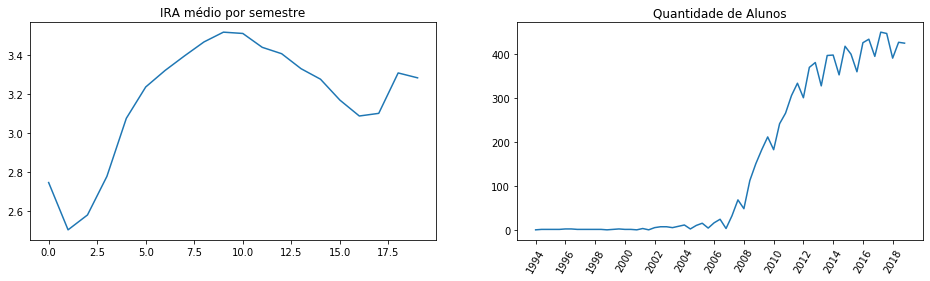

In [24]:
df_analysis = df_analysis.astype(float)
mean_ira = []

for semester in range (0,20):
    mean_ira.append(np.sum(np.multiply(df_analysis.IRA, df_analysis[str(semester)]))/np.sum(df_analysis[str(semester)]))

plt.figure(figsize=(16, 4))
plt.subplot(121);
x=np.arange(0,20)
plt.plot(x,mean_ira);
plt.title('IRA médio por semestre');

plt.subplot(122);
x=np.arange(0,len(df_analysis2.index))
plt.plot(x,df_analysis2['Quantidade de alunos']);
plt.title('Quantidade de Alunos');
plt.xticks(np.arange(0,len(df_analysis2.index),step=5),np.arange(int(df_analysis2['Semestre/Ano'][0].split('/')[0]), int(df_analysis2['Semestre/Ano'][len(df_analysis2.index)-1].split('/')[0]), step=2), rotation=60);

In [25]:
#read data in pandas dataframe
path = 'data/forma_ingresso_saida.csv'
df_analysis =  pd.read_csv(path, sep =';')
df_analysis = df_analysis.set_index('Forma_de_ingresso').T
df_analysis.columns = df_analysis.columns.str.replace(' ', '')

#list df head
df_analysis.head()

Forma_de_ingresso,Acordo_Cultural-PEC-G,Convênio_Andifes,Convênio-Int,Enem,Matrícula_Cortesia,PIE,Portador_Diplom_Curso_Superior,Programa_de_Avaliação_Seriada,Seleção,Sisu-Sistema_de_Seleção_Unificada,Transferência_Facultativa,Transferência_Obrigatória,Vestibular,Visitante
Aluno_Ativo,1.0,0.0,0.0,4.0,0.0,0.0,3.0,83.0,62.0,59.0,2.0,3.0,103.0,0.0
Anulação_de_Registro,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0
Desligamento_não_cumpriu_condição,0.0,0.0,0.0,2.0,0.0,0.0,1.0,7.0,1.0,6.0,0.0,1.0,52.0,1.0
Desligamento_com_Especialização,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Desligamento_Abandono,0.0,0.0,0.0,4.0,1.0,0.0,3.0,7.0,6.0,9.0,1.0,2.0,44.0,0.0


## <font color=black> Análise da distribuição da proporção de alunos ativos, formados ou desistentes em função do método de ingresso na universidade.</font>
##### <font color=black> Dado que o ENEM é um método de ingresso relativamente novo, começou a ser aplicado há 5 anos, então a primeira turma está formando agora e a quantidade de alunos ativos ainda é muito superior às demais. No vestibular tradicional a situação se inverte, visto que o sistema parou de ser aplicado por um tempo, a quantidade de alunos ativos é menor do que a de formados ou desistentes. </font>

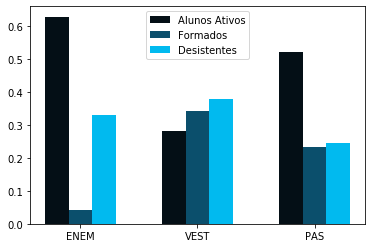

In [26]:
enem = df_analysis["Sisu-Sistema_de_Seleção_Unificada"]
vest = df_analysis["Vestibular"]
pas = df_analysis["Programa_de_Avaliação_Seriada"]

drop_enem = sum(enem) - enem["Formatura"] - enem["Aluno_Ativo"] - enem["Formatura_Pós-Graduação"] - enem["Formatura_com_Especialização"]
drop_pas = sum(pas) - pas["Formatura"] - pas["Aluno_Ativo"] - pas["Formatura_Pós-Graduação"] - pas["Formatura_com_Especialização"]
drop_vest = sum(vest) - vest["Formatura"] - vest["Aluno_Ativo"] - vest["Formatura_Pós-Graduação"] - vest["Formatura_com_Especialização"]

current_student = [enem["Aluno_Ativo"]/sum(enem), vest["Aluno_Ativo"]/sum(vest), pas["Aluno_Ativo"]/sum(pas)]
graduated_student = [enem["Formatura"]/sum(enem), vest["Formatura"]/sum(vest), pas["Formatura"]/sum(pas)]
dropout_student = [drop_enem/sum(enem), drop_vest/sum(vest), drop_pas/sum(pas)]

x=np.arange(1,4)
current_hist = plt.bar(x-0.2, current_student, width=0.2, color='#040F16', align='center')
graduated_hist = plt.bar(x, graduated_student, width=0.2, color='#0B4F6C', align='center')
dropout_hist = plt.bar(x+0.2, dropout_student, width=0.2, color='#01BAEF', align='center')
plt.legend( (current_hist[0], graduated_hist[0], dropout_hist[0]), ('Alunos Ativos', 'Formados', 'Desistentes') )
plt.xticks(x, ('ENEM', 'VEST', 'PAS'))

plt.show()

In [27]:
df_analysis = pd.read_excel ('data/formadeingresso_ira.xlsx').fillna(value=0)
df_analysis = df_analysis.set_index('Forma de ingresso').T
df_analysis.columns = df_analysis.columns.str.replace(' ', '')
df_analysis.head()

Forma de ingresso,AcordoCultural-PEC-G,Convênio-Andifes,Convênio-Int,Enem,MatrículaCortesia,PIE,PortadorDiplomCursoSuperior,ProgramadeAvaliaçãoSeriada,Seleção,Sisu-SistemadeSeleçãoUnificada,TransferênciaFacultativa,TransferênciaObrigatória,Vestibular,Visitante
0.0000,1.0,1.0,0.0,2.0,1.0,0.0,0.0,18.0,16.0,17.0,3.0,2.0,26.0,0.0
0.0333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0.0800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.1473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### <font color=black> Análise da distribuição do IRA dos alunos por cada método de ingresso.</font>

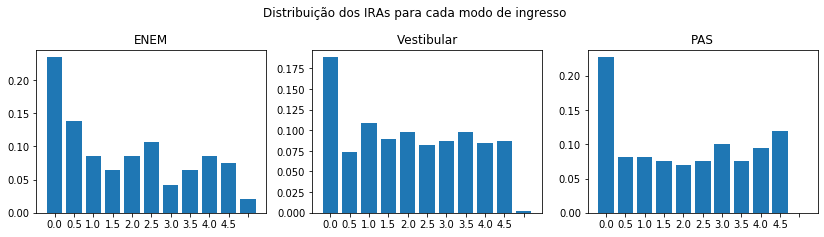

In [28]:
enem = df_analysis["Sisu-SistemadeSeleçãoUnificada"]
vest = df_analysis["Vestibular"]
pas = df_analysis["ProgramadeAvaliaçãoSeriada"]

enem_sum = []; vest_sum = []; pas_sum = [];
n = 10

inc = round(np.size(enem)/n)
for i in range (0, np.size(enem), inc):
    enem_sum.append(sum(enem[i:i+inc])/sum(enem))
    pas_sum.append(sum(pas[i:i+inc])/sum(pas))
    vest_sum.append(sum(vest[i:i+inc])/sum(vest))

x = np.arange(np.size(enem_sum))
x_axis = np.arange(0, 5, 5/n)
plt.figure(figsize=(14, 3))
plt.suptitle('Distribuição dos IRAs para cada modo de ingresso', y=1.08)

plt.subplot(131),
enem_hist = plt.bar(x, enem_sum)
plt.title('ENEM')
plt.xticks(x, x_axis)

plt.subplot(132),
vest_hist = plt.bar(x, vest_sum)
plt.title('Vestibular')
plt.xticks(x, x_axis)

plt.subplot(133),
pas_hist = plt.bar(x, pas_sum)
plt.title('PAS')
plt.xticks(x, x_axis)

plt.show()

In [29]:
df_analysis = pd.read_excel ('data/ano_ingresso_saida_forma_por_aluno.xlsx').fillna(value=0);
df_analysis.columns = df_analysis.columns.str.replace(' ', '');
df_analysis.head()

,Unnamed:0,Unnamed:1,AlunoAtivo,AnulaçãodeRegistro,AnulaçãodeRegistro.1,AnulaçãodeRegistro.2,AnulaçãodeRegistro.3,Deslig-nãocumpriucondição,Deslig-nãocumpriucondição.1,Deslig-nãocumpriucondição.2,...,Repr3vezesnamesmadiscobr,Repr3vezesnamesmadiscobr.1,Repr3vezesnamesmadiscobr.2,Repr3vezesnamesmadiscobr.3,Repr3vezesnamesmadiscobr.4,Repr3vezesnamesmadiscobr.5,Repr3vezesnamesmadiscobr.6,Repr3vezesnamesmadiscobr.7,Repr3vezesnamesmadiscobr.8,Transferência
0,0,0,9999,2014,2015,2018,2019,2010,2011,2012,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2015
1,Ano de ingresso,ID,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,...,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos,Quantidade de alunos
2,2008,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color=black> Análise da quantidade de alunos no curso em função do tempo na Universidade.</font>
##### <font color=black> É possível notar que a maior parte dos alunos ativos se encontram no primeiro ano do curso. O que coincide com a curva da desistência, mostrando que a maior parte dos alunos que entram desiste nos primeiros semestres. Também nota-se que a maior parte dos alunos que formam estão entre o 5º e 6º ano do curso. </font>

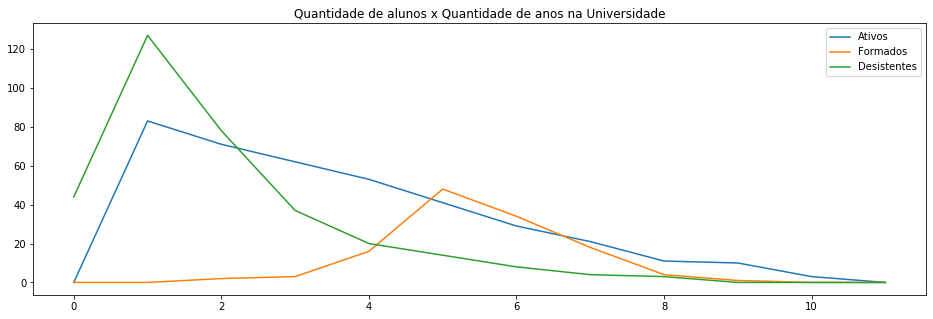

In [30]:
first_year = int(df_analysis['Unnamed:0'][2])
current_year = int(df_analysis['Unnamed:0'][len(df_analysis.index)-1])
current_student = np.zeros(current_year - first_year + 1)
graduated_student = np.zeros(current_year - first_year + 1)
dropout_student = np.zeros(current_year - first_year + 1)

for admission_mode in df_analysis.columns:
    for year in range(first_year, current_year):
        exit_year = int(df_analysis[admission_mode][0])
        if(admission_mode.split('.')[0] == 'AlunoAtivo'):
            current_student[current_year-year] = sum(df_analysis[admission_mode][df_analysis['Unnamed:0']==str(year)].astype(str).astype(int))
        elif (admission_mode.split('.')[0] == 'Formatura'):
            graduated_student[exit_year-year] = graduated_student[exit_year-year] + sum(df_analysis[admission_mode][df_analysis['Unnamed:0']==str(year)].astype(str).astype(int))
        elif (admission_mode != 'Unnamed:0' and admission_mode != 'Unnamed:1'):
            dropout_student[exit_year-year] = dropout_student[exit_year-year] + sum(df_analysis[admission_mode][df_analysis['Unnamed:0']==str(year)].astype(str).astype(int))

x=np.arange(0, current_year - first_year + 1)
plt.figure(figsize=(16, 5))
plt.title('Quantidade de alunos x Quantidade de anos na Universidade');

plt.plot(x,current_student, label="Ativos");
plt.plot(x, graduated_student, label="Formados");
plt.plot(x, dropout_student, label="Desistentes");
plt.legend(loc=1);
